In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('test.csv')
data.head(1)

,question,answer,wrong_answer,A,B,C,D,statement,tf,open,...,3_MC,3_MC_L,3_MC_C,2_MC,2_MC_L,2_MC_C,4_LFG_L,4_LFG_C,LFG_L,LFG_C
0,新生儿败血症的产时感染的途径是,黏膜破损,"['阴道细菌上行', '脐部感染', '消化道入侵']",阴道细菌上行,脐部感染,消化道入侵,黏膜破损,新生儿败血症的产时感染的途径是黏膜破损。,新生儿败血症的产时感染的途径是黏膜破损吗？回答'是'或者'不是'即可。,新生儿败血症的产时感染的途径是什么？,...,请选择一个正确选项。新生儿败血症的产时感染的途径是：A 阴道细菌上行 ，B 脐部感染 ，C...,0,0.677277,请选择一个正确选项。新生儿败血症的产时感染的途径是：A 阴道细菌上行 ，B 黏膜破损。只能选...,0,1.0,0,0.26,NaN,NaN


In [3]:
def ece_score(y_true, y_prob, n_bins=5):
    '''
    :param y_true: true label
    :param y_prob: predict probability
    :param n_bins: num of buckets
    :return: ECE score
    '''
    if len(np.unique(y_true)) == 2:
        y_true = y_true != np.min(y_true)
        bin_boundaries = np.linspace(0, 1, n_bins + 1)
        bin_lowers = bin_boundaries[:-1]
        bin_uppers = bin_boundaries[1:]

        accuracies = []
        confidences = []

        for bin_lower, bin_upper in zip(bin_lowers, bin_uppers):
            # 找到落入当前 bin 的预测概率
            in_bin = np.logical_and(bin_lower < y_prob, y_prob <= bin_upper)

            if in_bin.sum() > 0:
                accuracy = y_true[in_bin].mean()
                confidence = y_prob[in_bin].mean()
                accuracies.append(accuracy)
                confidences.append(confidence)

        accuracies = np.array(accuracies)
        confidences = np.array(confidences)

        ece = np.abs(accuracies - confidences).mean()

        return ece,accuracies,confidences

    else:
        print('Only support binary classification.')
        return None

In [4]:
def plot_reliability_diagram(y_true, y_prob, n_bins=5):
    '''
    :param y_true: true label
    :param y_prob: predict probability
    :param n_bins: num of buckets
    '''
    bin_boundaries = np.linspace(0, 1, n_bins + 1)
    bin_lowers = bin_boundaries[:-1]
    bin_uppers = bin_boundaries[1:]

    accuracies = []
    avg_confidences = []

    for bin_lower, bin_upper in zip(bin_lowers, bin_uppers):
        in_bin = np.logical_and(bin_lower < y_prob, y_prob <= bin_upper)
        if in_bin.sum() > 0:
            accuracy = y_true[in_bin].mean()
            avg_confidence = y_prob[in_bin].mean()
            accuracies.append(accuracy)
            avg_confidences.append(avg_confidence)
    plt.figure(figsize=(3,3),dpi=600)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.scatter(avg_confidences, accuracies,marker='^')
    plt.xlabel('Average predict probability',fontsize=14)
    plt.ylabel('Accuracy',fontsize=14)
    plt.title('Reliability Diagram of LFGQs',fontsize=14)
    #plt.show()
    #plt.savefig('1.png')

ECE: (0.3043192232864288, array([0.04790419, 0.17910448, 0.44444444, 0.64285714]), array([0.26700599, 0.51149254, 0.75648148, 0.99660714]))


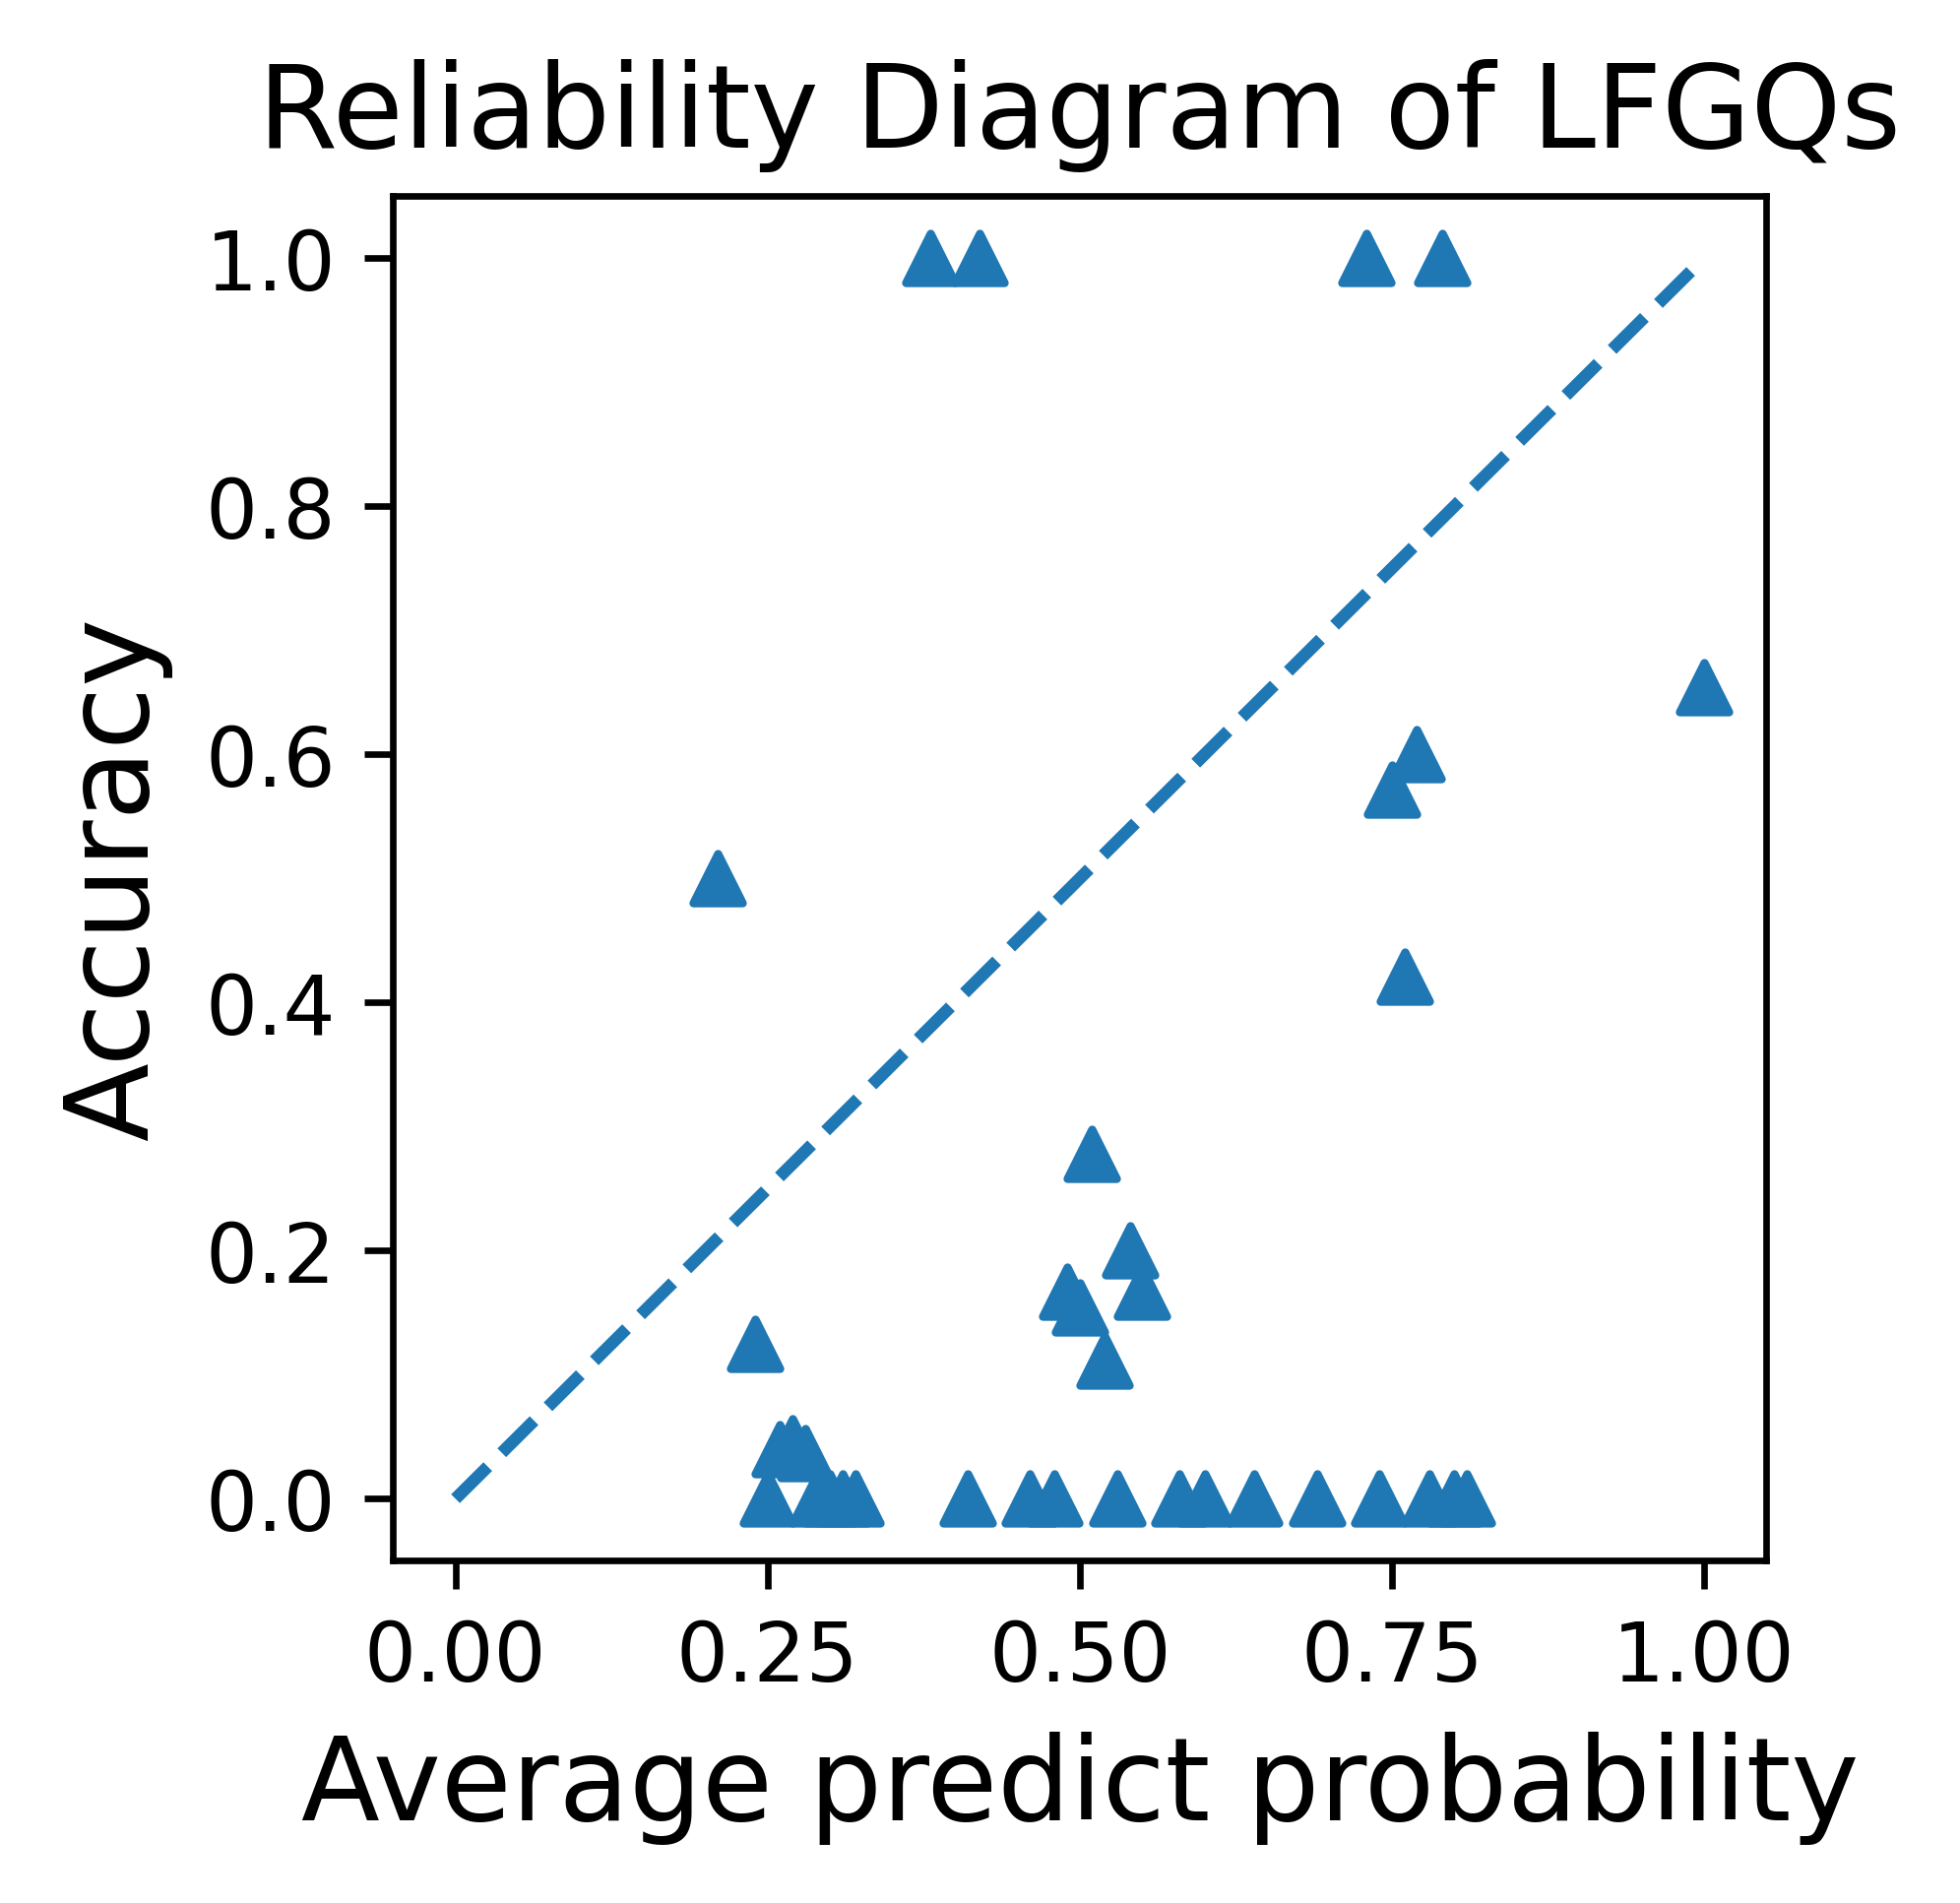

In [5]:
y_true = np.array(data['4_LFG_L'].to_list()) 
y_prob = np.array(data['4_LFG_C'].to_list())
ece = ece_score(y_true, y_prob, n_bins=5)
print('ECE:', ece)
plot_reliability_diagram(y_true, y_prob, n_bins=100)
plt.savefig('1.png')